#Task 4 : Image Reconstruction using Matrix Factorisation [4 Marks]
Use the instructor's notebook on matrix factorisation, and solve the following questions. Here, ground truth pixel values are missing for particular regions within the image- you don't have access to them.

1. Pick an image of your liking and reconstruct it using matrix factorization. Choose a suitable value for the rank
r
. Run Gradient Descent until it converges, plot the reconstructed image alongside the original image. Calculate and report the RMSE and PSNR metrics. [1 Marks]

2. Consider a case where 900 pixels (30x30) are randomly missing from an image. Reconstruct the image using matrix factorization, plot the reconstructed image, and calculate the RMSE and PSNR metrics. Next, reconstruct the same image with the missing pixels using Random Fourier Features (RFF) and Linear Regression. Compute the RMSE and PSNR for both methods, and compare the results to see which performs better.[3 Marks]

#Task 1

Step 1: Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from sklearn.linear_model import LinearRegression
from sklearn.kernel_approximation import RBFSampler

# For loading and handling images
from PIL import Image


Step 2: Load and Preprocess Image

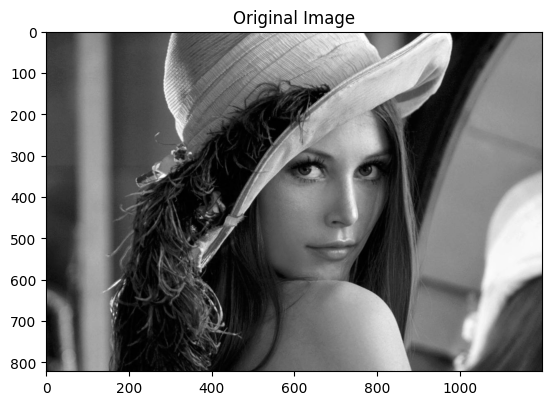

In [ ]:
# Load the image and convert it to grayscale
def load_image(path):
    img = Image.open(path).convert('L')
    img = np.array(img, dtype=np.float64) / 255  # Normalize image pixels
    return img

image = load_image("/content/13549827_web1_180914-CDT-booknotes.jpg")
plt.imshow(image,cmap='gray')
plt.title("Original Image")
plt.show()


In [ ]:
image.shape

(822, 1200)

Step 3: Matrix Factorization for Image Reconstruction

In [ ]:
# # Matrix Factorization using Gradient Descent
# def matrix_factorization(image, rank, steps=50, alpha=0.0002, beta=0.02):
#     m, n = image.shape
#     U = np.random.rand(m, rank)
#     V = np.random.rand(n, rank)

#     for step in range(steps):
#         for i in range(m):
#             for j in range(n):
#                 if image[i, j] > 0:  # Ignore missing pixels
#                     eij = image[i, j] - np.dot(U[i, :], V[j, :].T)
#                     for k in range(rank):
#                         U[i][k] += alpha * (2 * eij * V[j][k] - beta * U[i][k])
#                         V[j][k] += alpha * (2 * eij * U[i][k] - beta * V[j][k])
#     return np.dot(U, V.T)

# rank = 10  # Choose a suitable rank, lower implies more compressed but less detailed
# reconstructed_image = matrix_factorization(image, rank)

# # Plot the original and reconstructed images
# plt.subplot(1, 2, 1)
# plt.imshow(image, cmap='gray')
# plt.title("Original Image")
# plt.subplot(1, 2, 2)
# plt.imshow(reconstructed_image, cmap='gray')
# plt.title("Reconstructed Image")
# plt.show()

# # RMSE and PSNR Calculation
# rmse_value = np.sqrt(mean_squared_error(image, reconstructed_image))
# psnr_value = psnr(image, reconstructed_image)

# print(f"RMSE: {rmse_value}, PSNR: {psnr_value}")


Alternative to the above code, which is more optimised as:
1. Use Vectorization:
Replace the inner loops with matrix operations. This leverages efficient NumPy operations that are highly optimized for performance.

2. Stochastic Gradient Descent (SGD):
Instead of updating all pixels at once, you can sample a small batch or even a single pixel and update the factor matrices for that pixel. This makes the algorithm faster per iteration and can still converge effectively.

3. Reduce the Number of Steps:
Try reducing the number of gradient descent steps. You can set an appropriate stopping criterion, such as when the change in the loss between iterations becomes very small (converges).

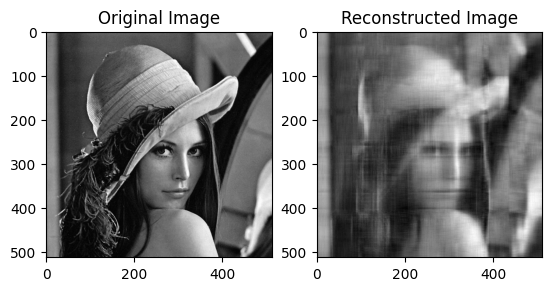

RMSE: 0.09634539709687265, PSNR: 20.323380578796343


In [ ]:
def matrix_factorization_sgd(image, rank, steps=500, alpha=0.0002, beta=0.02,tolerance=1e-4): #optimise the steps parameter
    m, n = image.shape
    U = np.random.rand(m, rank)
    V = np.random.rand(n, rank)
    prev_loss = np.inf #can be used for stopping criterion

    non_zero = np.argwhere(image > 0)  # Indices of non-zero pixels

    for step in range(steps):
        np.random.shuffle(non_zero)  # Shuffle non-zero pixels for SGD
        for i, j in non_zero:
            eij = image[i, j] - np.dot(U[i, :], V[j, :].T)
            U[i, :] += alpha * (2 * eij * V[j, :] - beta * U[i, :])
            V[j, :] += alpha * (2 * eij * U[i, :] - beta * V[j, :])
        # # Optionally, you can add a stopping criterion based on the change in RMSE or loss
        # # Calculate the loss
        # loss = np.sum((image - np.dot(U, V.T)) ** 2) / (m * n)

        # # Check for convergence
        # if abs(prev_loss - loss) < tolerance:
        #     print(f"Converged at step {step}")
        #     break
        # prev_loss = loss

    return np.dot(U, V.T)

rank = 50 #optimise this hyperparameter
reconstructed_image = matrix_factorization_sgd(image, rank)

# Plot original and reconstructed images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.show()

# RMSE and PSNR
rmse_value = np.sqrt(mean_squared_error(image, reconstructed_image))
psnr_value = psnr(image, reconstructed_image)
print(f"RMSE: {rmse_value}, PSNR: {psnr_value}")


#Task 2

Step 4: Handling Missing Pixels (Random Case)

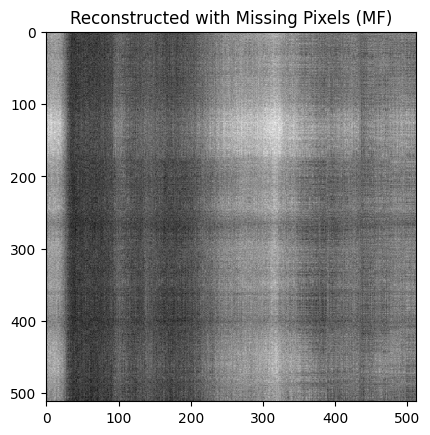

RMSE (MF): 0.20128553350154393, PSNR (MF): 13.923748739307662


In [ ]:
# Randomly remove 900 pixels
def remove_random_pixels(image, num_pixels=900):
    missing_image = image.copy()
    indices = np.random.choice(image.size, num_pixels, replace=False)
    missing_image[np.unravel_index(indices, image.shape)] = 0
    return missing_image, indices

missing_image, missing_indices = remove_random_pixels(image)

# Reconstruct the image using matrix factorization
reconstructed_missing_image = matrix_factorization_sgd(missing_image, rank=20,steps=100)

# RMSE and PSNR for matrix factorization
rmse_missing = np.sqrt(mean_squared_error(image, reconstructed_missing_image))
psnr_missing = psnr(image, reconstructed_missing_image)

plt.imshow(reconstructed_missing_image, cmap='gray')
plt.title("Reconstructed with Missing Pixels (MF)")
plt.show()

print(f"RMSE (MF): {rmse_missing}, PSNR (MF): {psnr_missing}")


Step 5: Random Fourier Features + Linear Regression

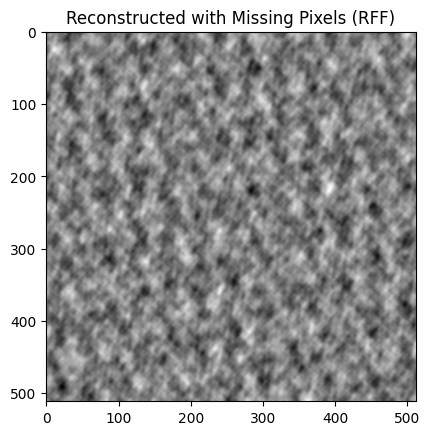

RMSE (RFF): 0.23825327826322523, PSNR (RFF): 12.459222298843386


In [ ]:
# Reconstruct using RFF + Linear Regression
def rff_reconstruction(image, missing_image, num_samples=100, gamma=0.1):
    X = np.argwhere(missing_image > 0)  # Observed pixels
    y = image[missing_image > 0]

    # Apply Random Fourier Features
    rbf_sampler = RBFSampler(gamma=gamma, n_components=num_samples)
    X_features = rbf_sampler.fit_transform(X)

    # Linear Regression to fit the observed data
    reg = LinearRegression()
    reg.fit(X_features, y)

    # Predict for all pixel locations
    all_pixel_locations = np.indices(image.shape).reshape(2, -1).T
    all_features = rbf_sampler.transform(all_pixel_locations)
    reconstructed_image = reg.predict(all_features).reshape(image.shape)

    return reconstructed_image

reconstructed_rff = rff_reconstruction(image, missing_image)

# RMSE and PSNR for RFF
rmse_rff = np.sqrt(mean_squared_error(image, reconstructed_rff))
psnr_rff = psnr(image, reconstructed_rff)

plt.imshow(reconstructed_rff, cmap='gray')
plt.title("Reconstructed with Missing Pixels (RFF)")
plt.show()

print(f"RMSE (RFF): {rmse_rff}, PSNR (RFF): {psnr_rff}")


Step 6: Comparing the Two Methods

In [ ]:
print(f"RMSE (MF): {rmse_missing}, PSNR (MF): {psnr_missing}")
print(f"RMSE (RFF): {rmse_rff}, PSNR (RFF): {psnr_rff}")


RMSE (MF): 0.20128553350154393, PSNR (MF): 13.923748739307662
RMSE (RFF): 0.23825327826322523, PSNR (RFF): 12.459222298843386


#Performing same tasks with RGB instead of GrayScale

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from sklearn.linear_model import LinearRegression
from sklearn.kernel_approximation import RBFSampler

# For loading and handling images
from PIL import Image


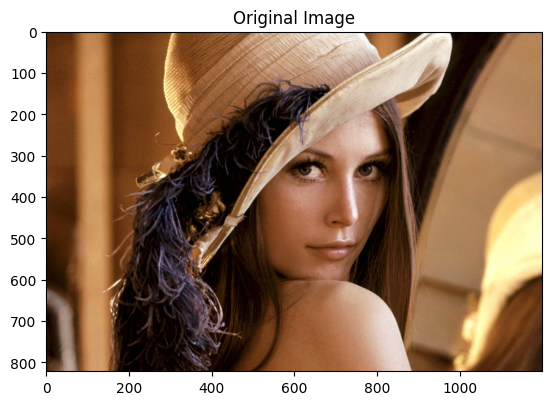

In [ ]:
# Load the image and convert it to grayscale
def load_image(path):
    img = Image.open(path)
    img = np.array(img, dtype=np.float64) / 255  # Normalize image pixels
    return img

image = load_image("/content/13549827_web1_180914-CDT-booknotes.jpg")
plt.imshow(image)
plt.title("Original Image")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Matrix Factorization using SGD for RGB images
def matrix_factorization_sgd_rgb(image, rank, steps=50, alpha=0.0002, beta=0.02, tolerance=1e-4):
    m, n, c = image.shape  # m: height, n: width, c: color channels
    reconstructed_image = np.zeros((m, n, c))  # Initialize reconstructed image

    # Perform matrix factorization on each channel (R, G, B) separately
    for channel in range(c):
        # Extract the current color channel
        image_channel = image[:, :, channel]

        # Initialize U and V matrices for the current channel
        U = np.random.rand(m, rank)
        V = np.random.rand(n, rank)

        # Get non-zero indices (observed pixels)
        non_zero = np.argwhere(image_channel > 0)

        prev_loss = np.inf  # Initialize previous loss for convergence checking

        for step in range(steps):
            np.random.shuffle(non_zero)  # Shuffle non-zero pixels for SGD
            for i, j in non_zero:
                eij = image_channel[i, j] - np.dot(U[i, :], V[j, :].T)
                U[i, :] += alpha * (2 * eij * V[j, :] - beta * U[i, :])
                V[j, :] += alpha * (2 * eij * U[i, :] - beta * V[j, :])

        # Reconstruct the current channel and store it in the final image
        reconstructed_image[:, :, channel] = np.dot(U, V.T)

    return reconstructed_image

# Load or pass your RGB image here (shape: 822, 1200, 3)
# Assuming `image` is already loaded as a (822, 1200, 3) numpy array
rank = 10  # optimize this hyperparameter
reconstructed_image = matrix_factorization_sgd_rgb(image, rank)

# Plot original and reconstructed images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image.astype(np.uint8))  # Convert to uint8 for proper display
plt.title("Reconstructed Image")
plt.show()

# RMSE and PSNR calculations (for all channels)
def rmse_rgb(original, reconstructed):
    return np.sqrt(mean_squared_error(original.flatten(), reconstructed.flatten()))

def psnr_rgb(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:  # Perfect match
        return 100
    max_pixel = 255.0  # Max pixel value for RGB images
    return 20 * np.log10(max_pixel / np.sqrt(mse))

rmse_value = rmse_rgb(image, reconstructed_image)
psnr_value = psnr_rgb(image, reconstructed_image)
print(f"RMSE: {rmse_value}, PSNR: {psnr_value}")


In [ ]:

# Function to remove random pixels from an RGB image
def remove_random_pixels_rgb(image, num_pixels=900):
    missing_image = image.copy()
    height, width, channels = image.shape

    # Remove the same pixels across all RGB channels
    indices = np.random.choice(height * width, num_pixels, replace=False)
    for channel in range(channels):
        missing_image[np.unravel_index(indices, (height, width)) + (channel,)] = 0

    return missing_image, indices

# Remove 900 random pixels
missing_image, missing_indices = remove_random_pixels_rgb(image)

# Matrix Factorization for RGB images (assuming the previous matrix_factorization_sgd_rgb function is used)
reconstructed_missing_image = matrix_factorization_sgd_rgb(missing_image, rank=20, steps=100)

# RMSE and PSNR for RGB images
def rmse_rgb(original, reconstructed):
    return np.sqrt(mean_squared_error(original.flatten(), reconstructed.flatten()))

def psnr_rgb(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Calculate RMSE and PSNR
rmse_missing = rmse_rgb(image, reconstructed_missing_image)
psnr_missing = psnr_rgb(image, reconstructed_missing_image)

# Plot the reconstructed image
plt.imshow(reconstructed_missing_image.astype(np.uint8))  # Convert to uint8 for proper display
plt.title("Reconstructed with Missing Pixels (MF)")
plt.show()

# Print RMSE and PSNR
print(f"RMSE (MF): {rmse_missing}, PSNR (MF): {psnr_missing}")


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.kernel_approximation import RBFSampler

# Reconstruct using RFF + Linear Regression for RGB images
def rff_reconstruction_rgb(image, missing_image, num_samples=100, gamma=0.1):
    m, n, c = image.shape  # m: height, n: width, c: channels
    reconstructed_image = np.zeros((m, n, c))  # Initialize reconstructed image

    for channel in range(c):
        # For each channel (R, G, B) perform RFF + Linear Regression
        X = np.argwhere(missing_image[:, :, channel] > 0)  # Observed pixels
        y = image[:, :, channel][missing_image[:, :, channel] > 0]

        # Apply Random Fourier Features
        rbf_sampler = RBFSampler(gamma=gamma, n_components=num_samples)
        X_features = rbf_sampler.fit_transform(X)

        # Linear Regression to fit the observed data
        reg = LinearRegression()
        reg.fit(X_features, y)

        # Predict for all pixel locations in the current channel
        all_pixel_locations = np.indices((m, n)).reshape(2, -1).T
        all_features = rbf_sampler.transform(all_pixel_locations)
        reconstructed_image[:, :, channel] = reg.predict(all_features).reshape(m, n)

    return reconstructed_image

# Run the RFF-based reconstruction on RGB images
reconstructed_rff_rgb = rff_reconstruction_rgb(image, missing_image)

# RMSE and PSNR for RGB images
def rmse_rgb(original, reconstructed):
    return np.sqrt(mean_squared_error(original.flatten(), reconstructed.flatten()))

def psnr_rgb(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Calculate RMSE and PSNR
rmse_rff_rgb = rmse_rgb(image, reconstructed_rff_rgb)
psnr_rff_rgb = psnr_rgb(image, reconstructed_rff_rgb)

# Plot the reconstructed image
plt.imshow(reconstructed_rff_rgb.astype(np.uint8))  # Convert to uint8 for proper display
plt.title("Reconstructed with Missing Pixels (RFF)")
plt.show()

# Print RMSE and PSNR
print(f"RMSE (RFF): {rmse_rff_rgb}, PSNR (RFF): {psnr_rff_rgb}")


In [ ]:
print(f"RMSE (MF): {rmse_missing}, PSNR (MF): {psnr_missing}")
print(f"RMSE (RFF): {rmse_rff}, PSNR (RFF): {psnr_rff}")
